# 분류 모델 - Decision Tree model

** 정의 **
- 여러가지 규칙을 순차적으로 적용하면서 독립변수 공간을 분할하는 분류모형
   - 독립변수 공간을 분할 한다.
- 분류 classification 와 회귀 regression 모두 사용가능하다. : CART (classification and regression tree) 모형   

** 분류학습 방법 **
- 여러 독립변수 중 하나의 독립변수를 선택한다.
   - 이 독립변수에 대한 기준값=분류규칙 threshold 을 정한다.
   - 이 과정을 반복한다.
- 전체 학습 데이터 집합(부모 노드)을 독립변수의 값이 기준값보다 작은 데이터 그룹(자식 노드1)과 해당 독립변수의 값이 기준값보다 큰 데이터 그룹(자식 노드2)로 나눈다.
- 각각의 자식 노드에 대해 위와 같은 과정을 반복하여 하위의 자식 노드를 만든다.
   - 자식 노드에 한 가지 클래스의 데이터만 존재하면 더이상 자식 노드를 만들지 않고 중지한다.
- 자식 노드가 증가하는 나무와 같은 형태로 표현 된다.

** 분류 예측 원리 **
- 조건부확률 분포 : P(Y=k | X)_node
   - 훈련 데이터는 분류규칙에 의해서 특정한 노드를 따라서 내려가게 된다. 
   - 각각의 노드는 그 노드를 선택한 데이터 집합을 가진다. 
      - 알콜 농도가 0.5 이하인 데이터만 모인 노드, 알콜 농도가 0.5 보다 큰 데이터만 모인 노드
   - 이렇게 노드에 모인 데이터의 클래스의 비율을 구하여 이것을 그 노드의 조건부 확률 분포라고 한다.
      - P(Y=k | X)_node
   - 검증 데이터 X_test 의 클래스를 예측할 때는 가장 상위의 노드부터 분류 규칙을 차례로 적용하여 마지막에 도달하는 노드의 조건부 확률 분포를 이용하여 클래스를 예측한다.
      - Y^ = arg max_k P(Y=k | X_test)last node
- 즉 데이터가 분류규칙을 따라서 특정 노드에 모이게 되고, 이 노드는 모인 데이터 집합의 클래스 비율에 맞는 조건부 확률 분포를 갖게 된다. 예측은 검증 데이터가 도달한 가장 마지막 노드의 조건부 확률분포에 의해서 이루어 진다.

** 분류 규칙을 정하는 방법 ** 
- 부모 노드와 자식 노드 간의 엔트로피를 가장 낮게 만드는 최상의 독립변수와 기준값(threshold)을 찾는 것
- 정보획득량 : information gain
   - 이러한 기준을 정량화한 것이 정보획득량이다.
   - 기본적으로 모든 독립변수와 모든 기준값에 대한 정보획득량을 구하고 가장 큰 정보획득량인 독립변수와 기준값을 선택한다.
   - 즉 데이터를 어떻게 구분하느냐에 따라서 엔드로피의 값이 달라지고, 엔트로피가 낮아지는 방향, 즉 질서도가 높아지는 방향으로 기준값과 독립변수를 선택하게 된다.
   - 선택 된 독립변수와 기준값이 분류규칙이 되고 여기에 따라서 데이터가 분류되어 자식노드로 내려가게 된다.
- 정보획득량의 원리
   - Y의 엔트로피 값에서 X에 대한 Y의 조건부 엔트로피 값을 뺸 값이다.
   - IG[Y, X] = H[Y] - H[Y | X]

** sklearn DT docs **
- DT : CART : 분류와 회귀에 사용할 수 있는 비모수적 지도학습 방법
   - 데이터의 특징(독립변수, x_d, feature)에서 추론한 의사결정 규칙을 학습한다. (분류규칙을 찾고 leaf node로 분할) 
   - 조각별 상수의 근사(constant approximation)로 볼 수 있음
   - sine curve(사인 곡선)에 근접하도록 학습한다.
   - 트리가 깊을 수록(max_depth) 의사결정이 더욱 복잡해지고 모델이 더 저갑해진다. (fitter model)
- 장점
   - 이해가 쉽고 시각화할 수 있다.
   - 데이터 전처리가 필요없다. 다른 방법, 모델에서는 데이터 정규화, 더미 변수를 만들거나 빈값을 제거해야하지만, 의사결정나무는 결측값이 있어도 가능하다.
   - 숫자형, 범주형(카테고리형) 데이터에 모두 적용가능. sklearn의 모델은 범주형은 지원하지 않는다.
   - 다중 출력 문제를 처리할 수 있다. (multi-output)
   - white box model로 동작 방식을 설명하기 편하다. black box model은 인공신경망.
   - 통계 테스트로 모델의 적합성을 검증할 수 있다.
- 단점
   - 지나치게 복잡한 트리를 만들 수 있다. 과적합이 생길 수 있다. (학습 데이터에 과도하게 적합해지는 현상, 검증 데이터에서는 성능이 떨어짐.)
   - 이러한 문제를 방지하기 위해서는 모델의 parameter를 조절해야 한다. min_samples_leaf, max_depth 등.
   - 데이터가 조금만 변해도 완전히 다른 트리가 만들어질 수 있다. 앙상블 모델을 적용하여 해결 할 수 있다.
   - 조각별 상수의 근사치이므로 예측이 매끄럽거나 연속적이지 않다.
   - 실용적인, 적합한 의사결정나무는 결과적으로 각 노드에서 이루어지는 최적의 결정이 이루어지는 탐욕적 알고리즘과 같은 휴리스틱 알고리즘에 기반한다.
   - 이러한 휴리스틱 알고리즘에 기반하면 최적의 의사결정 나무를 반환한다고 보장할 수 없다. 따라서 특징과 샘플이 무작위로 선택되는 앙상블 학습기에서 여러가지 트리를 학습시켜서 완화된다.
   - XOR, parity, multiplexer 문제에서는 잘 작동하지 않는다.
   - 데이터 셋이 한쪽으로 편향되어 있으면 모델은 편향된 트리를 만든다. 따라서 데이터 세트의 균형을 맞춰야한다.
- parameters
   - criterion : {"gini", "entropy", "log_loss"} : 정보 획득량 계산 방법, 즉 노드 분할 기준을 측정하는 방법
   - spliter : {"best", "random"} : 노드에서 분할을 선택하는 방식, best냐 random 이냐 선택
   - max_depth : tree의 최대 깊이, None이면 모든 노드(리프)가 더이상 분할 하지 않을때까지 분할함, min_samples_split 보다 적은 샘플이 포함 될 떄가지
   - min_samples_split : 노드를 분할하는데 필요한 최소 샘플 수, 노드가 분할 될때 필요한 데이터 집합의 샘플 수
   - min_samples_leaf : 노드가 분할 될 때 노드에 남겨져야하는 최소 샘플의 수
   - min_weight_fraction_leaf : 노드에 있어야 하는 모든 입력샘플의 가중치 합계의 최소 가중치 비율
   - max_features : 최상의 분할을 찾을 때 고려해야 할 독립변수의 수
      - max_features=sqrt(n_features), max_features=log2(n_features) : sqrt와 log2 변형을 적용할 수 있다.
   - random_state : 분류기의 무작위성 수치, 
      - max_feature가 n_feature 보다 작으면 무작위로 max_feature를 선택한다.
      - max_feature=n_feautre 이면 가장 좋은 분할을 찾는데 실행할 때마다 달라질 수 있다.
   - max_leaf_nodes : 리프 노드의 갯수, 나무를 성장시키는 수치, None이면 노드의 수에 제한이 없음
   - min_impurity_decrease : 불순물 값 계산 기준 수치, 
   - class_weight : 클래스별 가중치 값, {class_label: weight}. "balance"이면 클래스별 가중치를 발란스 있게 정함
- attribute
   - 모델 훈련 후 반환 값들
   - feature_importances_ : 독립변수 별 중요도

## classification
- 다중 클래스 분류

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
X = [[0, 0], [1, 1]]
y = [0, 1]
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

In [7]:
new_X = [[0, 1]]
tree.predict(new_X)

array([1])

In [8]:
tree.predict_proba(new_X)

array([[0., 1.]])

In [9]:
from sklearn import tree
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier()
clf.fit(X, y)
tree.plot_tree(clf)

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

### graphviz 모듈을 사용하여 tree의 결과를 pdf로 저장

In [11]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

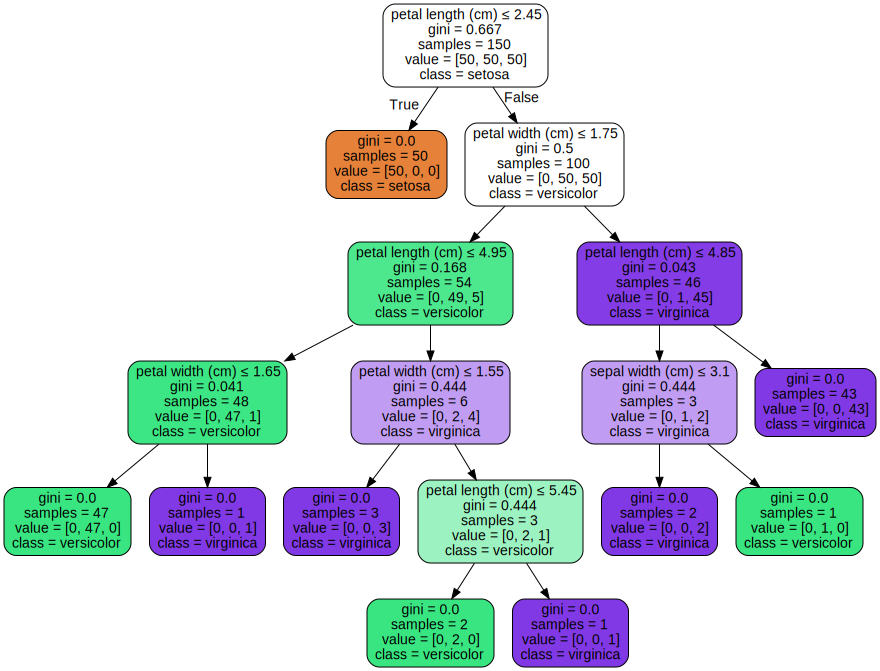

In [13]:
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           rounded=True, filled=True,
                           special_characters=True)
graphviz.Source(dot_data)

In [14]:
graphviz.Source(dot_data).render("iris2")

'iris2.pdf'

## regression
- DecisionTreeRegressor

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
X = [[0, 1], [2, 2]]
y = [0.5, 2.1]

clf = DecisionTreeRegressor()
clf.fit(X, y)
clf.predict([[1.5, 1]])

array([0.5])

In [21]:
# 난수 생성기
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
X

array([[5.71874087e-04],
       [9.14413867e-02],
       [9.68347894e-02],
       [1.36937966e-01],
       [1.95273916e-01],
       [2.49767295e-01],
       [2.66812726e-01],
       [4.25221057e-01],
       [4.61692974e-01],
       [4.91734169e-01],
       [5.11672144e-01],
       [5.16130033e-01],
       [6.50142861e-01],
       [6.87373521e-01],
       [6.96381736e-01],
       [7.01934693e-01],
       [7.33642875e-01],
       [7.33779454e-01],
       [8.26770986e-01],
       [8.49152098e-01],
       [9.31301057e-01],
       [9.90507445e-01],
       [1.02226125e+00],
       [1.05814058e+00],
       [1.32773330e+00],
       [1.40221996e+00],
       [1.43887669e+00],
       [1.46807074e+00],
       [1.51166286e+00],
       [1.56712089e+00],
       [1.57757816e+00],
       [1.72780364e+00],
       [1.73882930e+00],
       [1.98383737e+00],
       [1.98838418e+00],
       [2.07027994e+00],
       [2.07089635e+00],
       [2.08511002e+00],
       [2.08652401e+00],
       [2.09597257e+00],


In [22]:
y = np.sin(X).ravel()
y

array([ 5.71874056e-04,  9.13140084e-02,  9.66835240e-02,  1.36510390e-01,
        1.94035253e-01,  2.47178482e-01,  2.63658285e-01,  4.12522163e-01,
        4.45464463e-01,  4.72155294e-01,  4.89635918e-01,  4.93517994e-01,
        6.05300129e-01,  6.34509327e-01,  6.41446076e-01,  6.45696215e-01,
        6.69579781e-01,  6.69681218e-01,  7.35748344e-01,  7.50720534e-01,
        8.02397078e-01,  8.36304301e-01,  8.53289303e-01,  8.71444956e-01,
        9.70605329e-01,  9.85824622e-01,  9.91311217e-01,  9.94728365e-01,
        9.98252126e-01,  9.99993246e-01,  9.99977003e-01,  9.87699652e-01,
        9.85915646e-01,  9.15904395e-01,  9.14069859e-01,  8.77830014e-01,
        8.77534605e-01,  8.70630546e-01,  8.69934082e-01,  8.65235592e-01,
        8.60400242e-01,  7.84646075e-01,  6.31686553e-01,  5.37227991e-01,
        4.58019714e-01,  4.45838347e-01,  4.32721158e-01,  3.41153283e-01,
        2.67699531e-01,  2.07303185e-01,  1.93830272e-01, -1.76451855e-01,
       -2.09188375e-01, -

In [23]:
rng.rand(16)

array([0.88330609, 0.62367221, 0.75094243, 0.34889834, 0.26992789,
       0.89588622, 0.42809119, 0.96484005, 0.6634415 , 0.62169572,
       0.11474597, 0.94948926, 0.44991213, 0.57838961, 0.4081368 ,
       0.23702698])

In [ ]:
80 / 5

In [28]:
y[::5] += 3 * (0.5 - rng.rand(16))

In [29]:
y[::5]

array([-1.20956669,  0.02614002,  1.98102494,  0.29426147,  1.32246237,
        0.90465031, -0.15784929,  1.30602073, -0.36520521,  0.075758  ,
        1.64636654, -1.57513771, -1.01666557, -2.21266332,  0.03431138,
        0.09139241])

In [30]:
dt_regr_1 = DecisionTreeRegressor(max_depth=2)
dt_regr_2 = DecisionTreeRegressor(max_depth=5)
dt_regr_3 = DecisionTreeRegressor(max_depth=8)

dt_regr_1.fit(X, y)
dt_regr_2.fit(X, y)
dt_regr_3.fit(X, y)

DecisionTreeRegressor(max_depth=8)

In [32]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
X_test.shape

(500, 1)

In [35]:
y_pred_1 = dt_regr_1.predict(X_test)
y_pred_2 = dt_regr_2.predict(X_test)
y_pred_3 = dt_regr_3.predict(X_test)

In [37]:
y_pred_1.shape, y_pred_2.shape, y_pred_3.shape

((500,), (500,), (500,))

In [38]:
%matplotlib inline

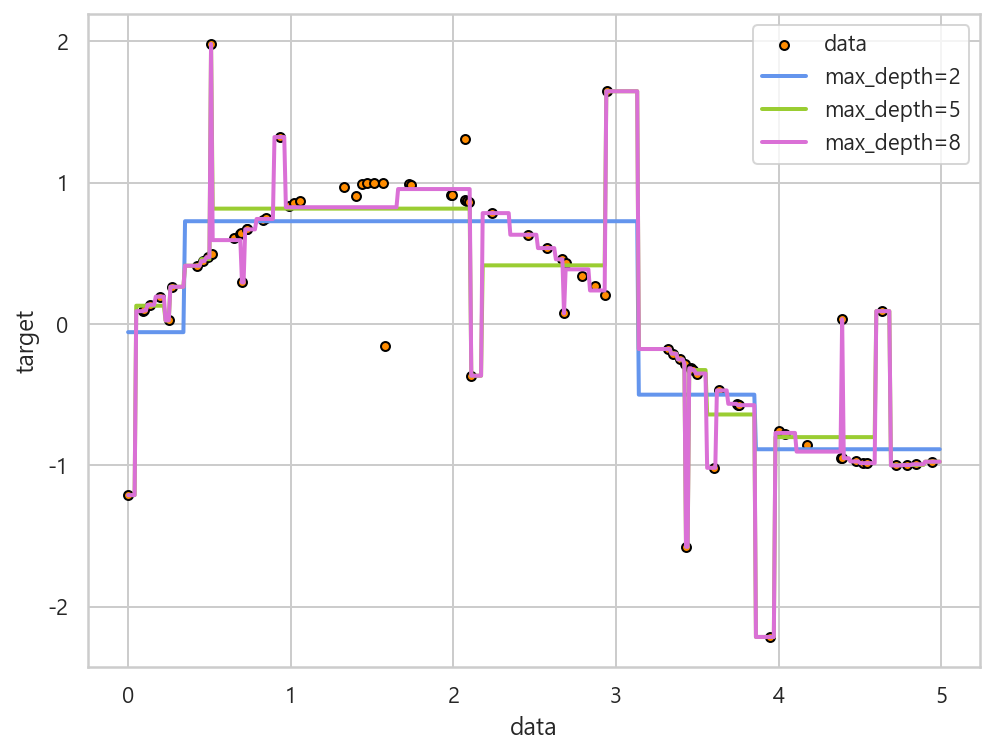

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_pred_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_pred_3, color="orchid", label="max_depth=8", linewidth=2)
plt.legend()
plt.xlabel("data")
plt.ylabel("target")
plt.show() ; 

## 다중 출력 문제
- 다중출력 회귀, 다중출력 분류
- y가 1차원 클래스가 아니라, 2차원인 경우
   - (n_samples, n_outputs)
- DTC, DTR 모두에서 다중 출력 문제를 분석할 수 있다.

### 다중출력 회귀

In [45]:
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
X

array([[-99.97712504],
       [-99.42593459],
       [-96.34234453],
       [-96.12660843],
       [-94.52248136],
       [-92.18904335],
       [-90.00930821],
       [-89.32749098],
       [-82.99115773],
       [-81.53228105],
       [-80.33063323],
       [-79.53311423],
       [-79.35479868],
       [-77.05080541],
       [-73.99428558],
       [-72.50505917],
       [-72.14473055],
       [-71.92261228],
       [-70.65428502],
       [-70.64882184],
       [-66.92916058],
       [-66.03391609],
       [-62.74795772],
       [-60.37970218],
       [-59.10955005],
       [-57.6743768 ],
       [-52.59460395],
       [-46.89066813],
       [-46.01442165],
       [-43.91120159],
       [-42.44493228],
       [-41.27717033],
       [-39.53348547],
       [-37.31516437],
       [-36.8968738 ],
       [-30.88785459],
       [-30.44682805],
       [-30.2203316 ],
       [-20.64650515],
       [-20.4646326 ],
       [-18.37263945],
       [-17.18880244],
       [-17.16414609],
       [-16

In [46]:
X.shape

(100, 1)

In [47]:
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y

array([[ 1.65234252,  2.6719597 ],
       [ 2.80694332,  1.41091233],
       [-2.72043225, -1.57125834],
       [-2.99372396, -0.95248164],
       [-0.85218806,  3.02380223],
       [ 2.77497039, -1.47280132],
       [-2.79534903, -1.43374621],
       [-3.07394347,  0.64844117],
       [-3.03515591,  0.81082243],
       [ 0.46676469,  3.10672418],
       [ 3.06585816,  0.68565164],
       [ 2.63212356, -1.71508891],
       [ 2.28617935, -2.15475947],
       [-3.13109169, -0.25665006],
       [ 3.09796044,  0.5217715 ],
       [ 0.77245687, -3.0451461 ],
       [-0.35081253, -3.1219441 ],
       [-1.02994699, -2.96796455],
       [-3.14002924,  0.09909982],
       [-3.13944098,  0.11625281],
       [ 2.56582177, -1.81277771],
       [ 0.18985749, -3.13585053],
       [ 0.26325594,  3.1305432 ],
       [ 1.99838765, -2.42405676],
       [-1.72353425, -2.62660124],
       [-2.83551698,  1.35257084],
       [-2.28076115, -2.16049369],
       [-0.72606345, -3.05653992],
       [-2.81317706,

In [48]:
y.shape

(100, 2)

In [49]:
y[::5]

array([[ 1.65234252,  2.6719597 ],
       [ 2.77497039, -1.47280132],
       [ 3.06585816,  0.68565164],
       [ 0.77245687, -3.0451461 ],
       [ 2.56582177, -1.81277771],
       [-2.83551698,  1.35257084],
       [ 3.1398372 ,  0.10500846],
       [ 1.58295072,  2.71364541],
       [ 1.4421227 ,  2.79103682],
       [ 1.37534296, -2.82454176],
       [-3.12099582, -0.35915103],
       [-2.31489497,  2.12387986],
       [-2.62377557,  1.72783279],
       [ 3.06043584,  0.70946237],
       [ 1.96638644,  2.4500875 ],
       [ 2.9473419 ,  1.08755697],
       [ 3.03307779,  0.81856188],
       [ 0.70171651,  3.06222115],
       [-2.652863  ,  1.68283163],
       [ 2.93747396, -1.11393497]])

In [50]:
y[::5] += 0.5 - rng.rand(20, 2)

In [51]:
y[::5]

array([[ 1.82569761,  2.64490159],
       [ 2.38902829, -1.33007108],
       [ 2.65732301,  0.56229152],
       [ 1.25663563, -3.47458334],
       [ 2.37492485, -2.31010056],
       [-2.50785749,  1.71543509],
       [ 2.70724173, -0.0918097 ],
       [ 2.01695054,  2.45818236],
       [ 1.18824651,  2.36801228],
       [ 1.1638182 , -2.44881272],
       [-2.64087596,  0.11463798],
       [-1.84320146,  2.37766879],
       [-2.98380352,  1.68900173],
       [ 3.00761386,  0.36743148],
       [ 2.34221313,  2.67090382],
       [ 2.86158262,  0.61796122],
       [ 2.97204757,  1.29991459],
       [ 0.40108384,  3.32924687],
       [-2.9599682 ,  1.79497099],
       [ 2.57393211, -1.36105661]])

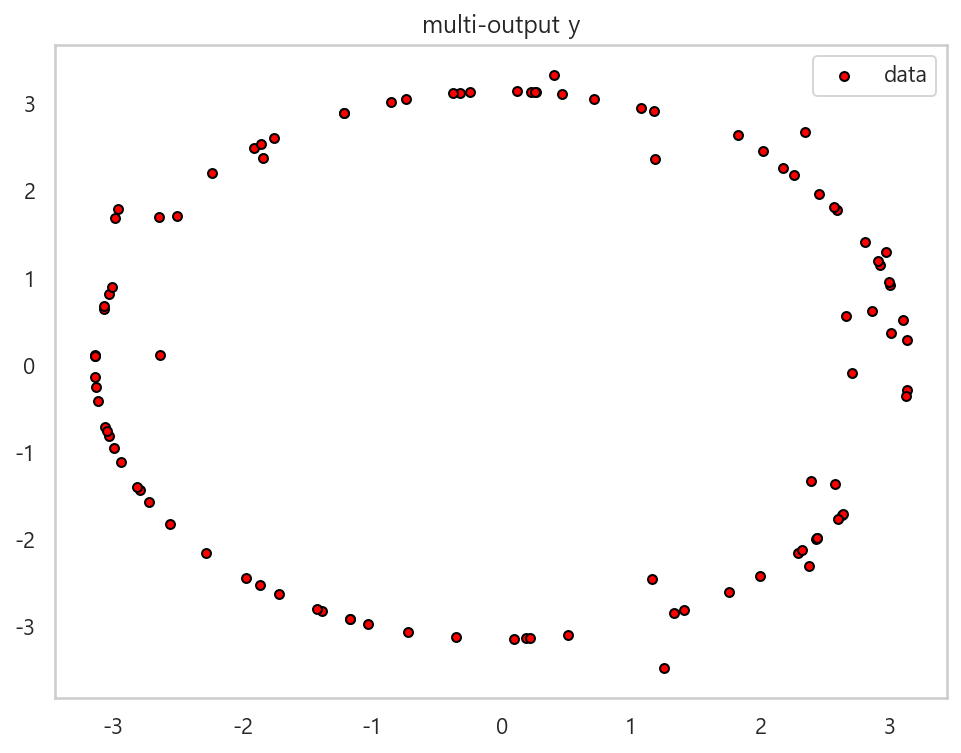

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(y[:, 0], y[:, 1], color="red", s=20, edgecolor="black", label="data")
plt.title("multi-output y")
plt.legend()
plt.grid(False)
plt.show() ; 

In [65]:
dtr_1 = DecisionTreeRegressor(max_depth=2)
dtr_2 = DecisionTreeRegressor(max_depth=5)
dtr_3 = DecisionTreeRegressor(max_depth=8)

dtr_1.fit(X, y)
dtr_2.fit(X, y)
dtr_3.fit(X, y)

X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
pred_1 = dtr_1.predict(X_test)
pred_2 = dtr_2.predict(X_test)
pred_3 = dtr_3.predict(X_test)

In [69]:
pred_1.shape, pred_2.shape, pred_3.shape

((20000, 2), (20000, 2), (20000, 2))

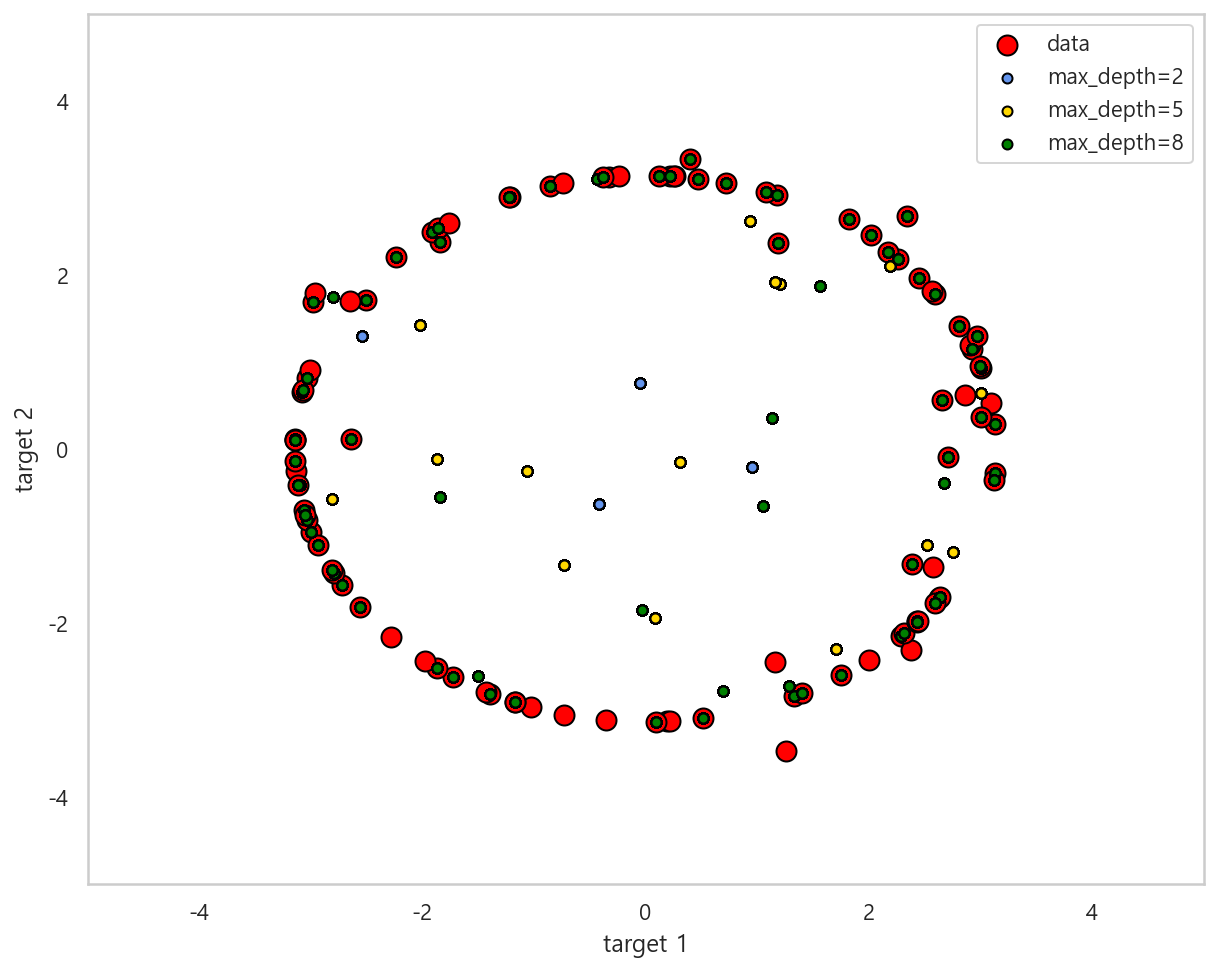

In [80]:
plt.figure(figsize=(10, 8))

plt.scatter(y[:, 0], y[:, 1], c="red", edgecolor="black", s=100, label="data")
plt.scatter(pred_1[:, 0], pred_1[:, 1], 
            c="cornflowerblue", edgecolor="black", s=25, label="max_depth=2")
plt.scatter(pred_2[:, 0], pred_2[:, 1],
            c="gold", edgecolor="black", s=25, label="max_depth=5")
plt.scatter(pred_3[:, 0], pred_3[:, 1],
           c="green", edgecolor="black", s=25, label="max_depth=8")
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.grid(False)
plt.legend()
plt.show() ; 

In [86]:
np.hstack([X, y])[:10]0n

array([[-99.97712504,   1.82569761,   2.64490159],
       [-99.42593459,   2.80694332,   1.41091233],
       [-96.34234453,  -2.72043225,  -1.57125834],
       [-96.12660843,  -2.99372396,  -0.95248164],
       [-94.52248136,  -0.85218806,   3.02380223],
       [-92.18904335,   2.38902829,  -1.33007108],
       [-90.00930821,  -2.79534903,  -1.43374621],
       [-89.32749098,  -3.07394347,   0.64844117],
       [-82.99115773,  -3.03515591,   0.81082243],
       [-81.53228105,   0.46676469,   3.10672418]])

In [87]:
dtr_1.score(X, y)

0.10738638814934587

In [88]:
dtr_2.score(X, y)

0.5293705613541346

In [90]:
dtr_3.score(X, y)

0.8787350102813696

## 다중출력 문제
- 다중출력 분류
   - X : 이미지의 상부 절반
   - y : 이미지의 하부 절반
   - target을 라벨이 아니라 이미지의 하부의 픽셀값으로 설정
   - 모델에서 반환하는 예측값은 이미지의 하부 픽셀값
- face completion with a multi-output estimators
   - 얼굴의 상부를 토대로 하부를 예측하는 것

In [1]:
from sklearn.datasets import fetch_olivetti_faces

In [2]:
data, targets = fetch_olivetti_faces(return_X_y=True)

data.shape, targets.shape

((400, 4096), (400,))

In [3]:
train = data[targets < 30]
test = data[targets >= 30]

In [6]:
train.shape, test.shape

((300, 4096), (100, 4096))

In [7]:
np.unique(targets, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10], dtype=int64))

### test on a subset of people

In [8]:
from sklearn.utils.validation import check_random_state

In [9]:
n_faces = 5
rng = check_random_state(4)
rng

RandomState(MT19937) at 0x1E3F8314488

In [10]:
face_ids = rng.randint(test.shape[0], size=(n_faces,))
face_ids

array([46, 55, 69,  1, 87])

In [11]:
test.shape

(100, 4096)

In [12]:
test = test[face_ids, :]
test

array([[0.41735536, 0.446281  , 0.446281  , ..., 0.8016529 , 0.80991733,
        0.79752064],
       [0.13636364, 0.17768595, 0.21487603, ..., 0.6818182 , 0.71900827,
        0.74380165],
       [0.2892562 , 0.2892562 , 0.23553719, ..., 0.3264463 , 0.3677686 ,
        0.3966942 ],
       [0.6983471 , 0.78099173, 0.8057851 , ..., 0.47933885, 0.5       ,
        0.677686  ],
       [0.3677686 , 0.35950413, 0.38016528, ..., 0.2644628 , 0.2768595 ,
        0.28099173]], dtype=float32)

### upper half of the faces

In [16]:
data.shape[1]

4096

In [14]:
(data.shape[1] + 1) // 2

2048

In [15]:
n_pixels = data.shape[1]
X_train = train[:, : (n_pixels + 1) // 2]
X_train.shape

(300, 2048)

### lower half of the faces

In [17]:
n_pixels // 2

2048

In [18]:
y_train = train[:, n_pixels // 2 :]
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 : ]

y_train.shape, X_test.shape, y_test.shape

((300, 2048), (5, 2048), (5, 2048))

### fit estimators
- 분류기의 학습 데이터
   - X_train : 이미지의 상부
   - y_train : 이미지의 하부
- 즉 라벨값을 target으로 사용하지 않고, 이미지의 절반을 target으로 사용함
   - X_test를 넣어 반환된 predict는 절반 이미지에 대한 예측값

In [22]:
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [51]:
estimators = {
    "extra-tree": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear": LinearRegression(),
    "Ridge": RidgeCV()
}

y_test_predict = dict()
scores = dict()
for name, estimator in estimators.items() :
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)
    scores[name] = estimator.score(y_test, y_test_predict[name])

In [100]:
scores

{'extra-tree': -0.9337158740786067,
 'K-nn': -0.48771524234217645,
 'Linear': -4.675031227123971,
 'Ridge': -1.9274609272085612}

In [99]:
d = [(k, v) for k, v in scores.items()]
d = dict(np.sort(d, axis=0))
d

{'K-nn': '-0.48771524234217645',
 'Linear': '-0.9337158740786067',
 'Ridge': '-1.9274609272085612',
 'extra-tree': '-4.675031227123971'}

### plot faces

In [30]:
%matplotlib inline

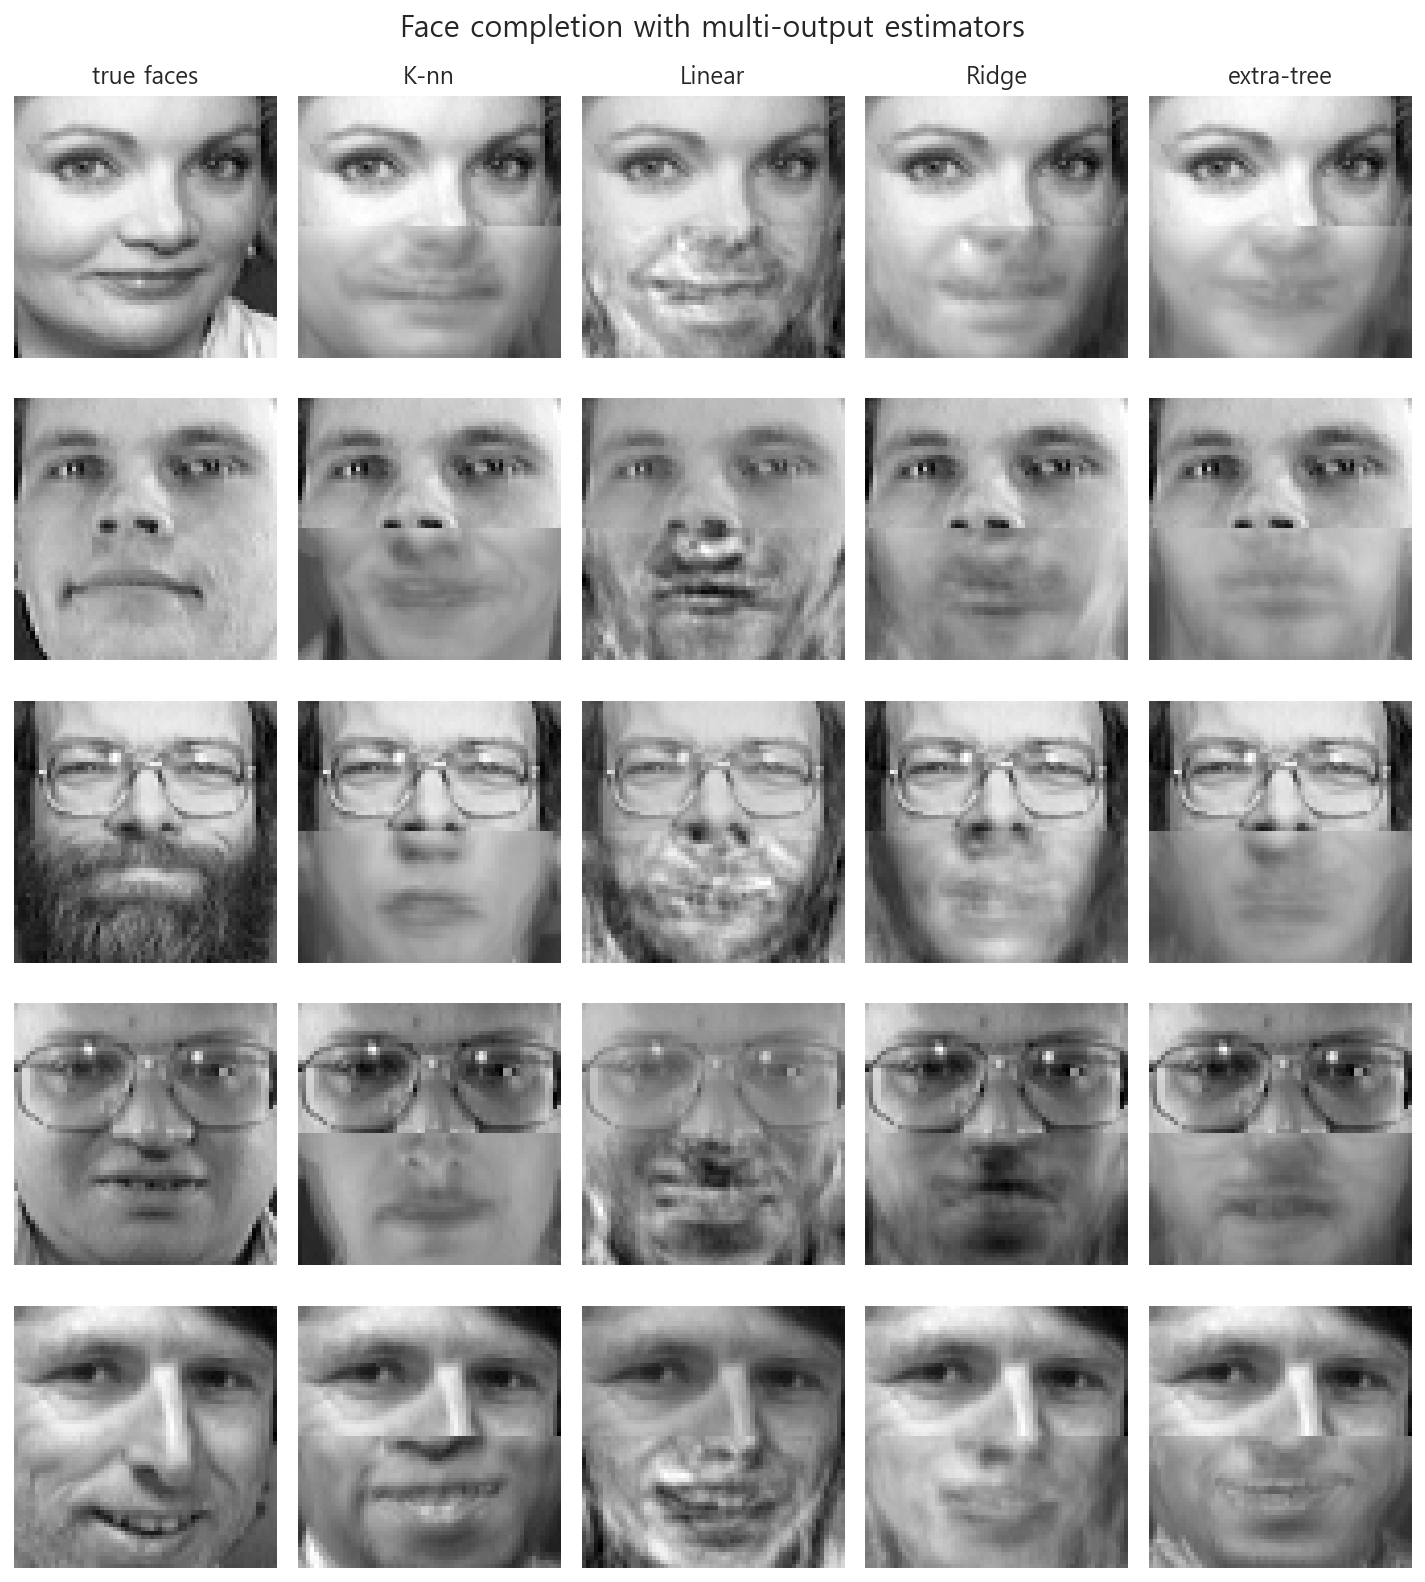

In [38]:
image_shape = (64, 64)
n_cols = 1 + len(estimators)

plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=15)

for i in range(n_faces) : 
    # 실제 이미지 : 0~2047 + 2047~4096
    true_face = np.hstack((X_test[i], y_test[i]))
    
    # i != 0
    if i :
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    # i = 0
    else :
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")
        
    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")
    
    for j, est in enumerate(sorted(estimators)) : 
        # 실제 이미지 + 예측 이미지 : 아랫부분 절반을 predict 값으로 가져와서 합침
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))
        
        if i : 
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        else : 
            # est : 'K-nn', 'Linear', 'Ridge', 'extra-tree'
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)
        
        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                  cmap=plt.cm.gray,
                  interpolation="nearest")

plt.tight_layout()
plt.show() ; 

In [32]:
sorted(estimators)

['K-nn', 'Linear', 'Ridge', 'extra-tree']

In [33]:
X_test[0]

array([0.41735536, 0.446281  , 0.446281  , ..., 0.38429752, 0.33471075,
       0.26859504], dtype=float32)

In [34]:
y_test[0]

array([0.59917355, 0.6198347 , 0.6487603 , ..., 0.8016529 , 0.80991733,
       0.79752064], dtype=float32)

In [37]:
np.hstack((X_test[0][:3], y_test[0][:3]))

array([0.41735536, 0.446281  , 0.446281  , 0.59917355, 0.6198347 ,
       0.6487603 ], dtype=float32)

In [39]:
for i in range(5) : 
    if i :
        print("true if, ", i)
    else : 
        print("else if, ", i)

else if,  0
true if,  1
true if,  2
true if,  3
true if,  4


In [49]:
y_train.shape, y_test.shape

((300, 2048), (5, 2048))